In [1]:
import sys
import os
import matplotlib.pyplot as plt
BASE_DIR = os.getcwd()
sys.path.append(os.path.abspath(BASE_DIR))
from model_history import ModelHistory

In [2]:
path = BASE_DIR+"\loss_history/all_loss.json"
data = ModelHistory.load_history_json(path)

In [3]:
data['EARLY_QUANT'].keys()

dict_keys(['train_main_loss', 'train_mape', 'train_tube', 'test_main_loss', 'test_mape', 'test_tube'])

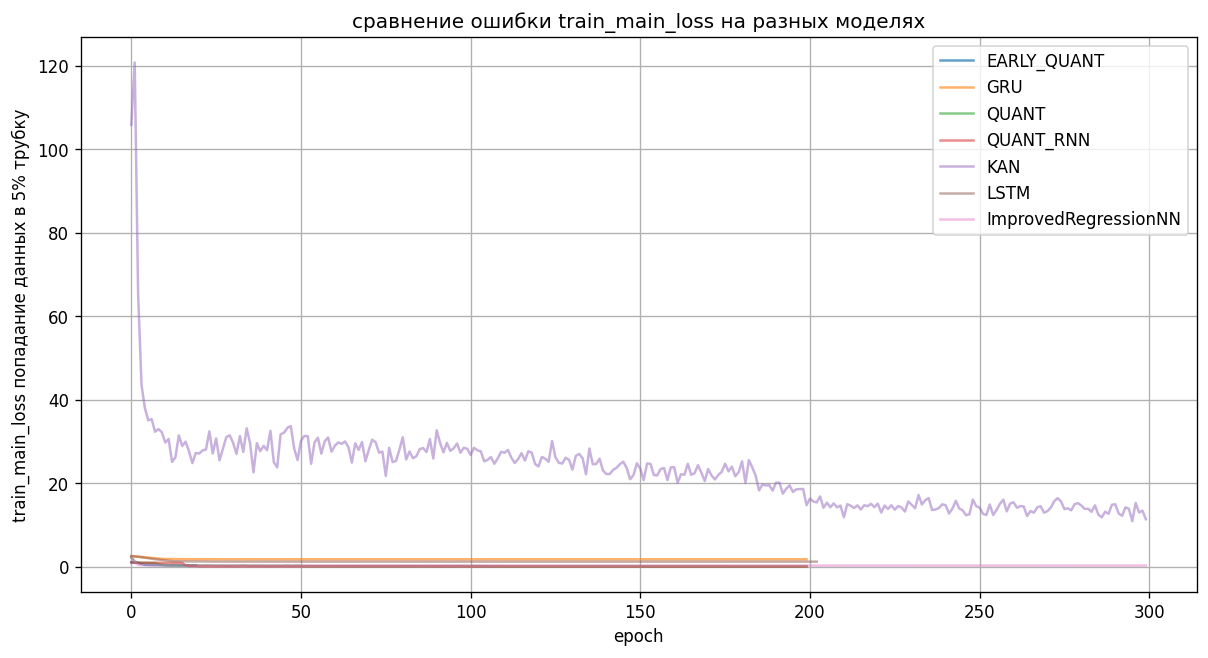

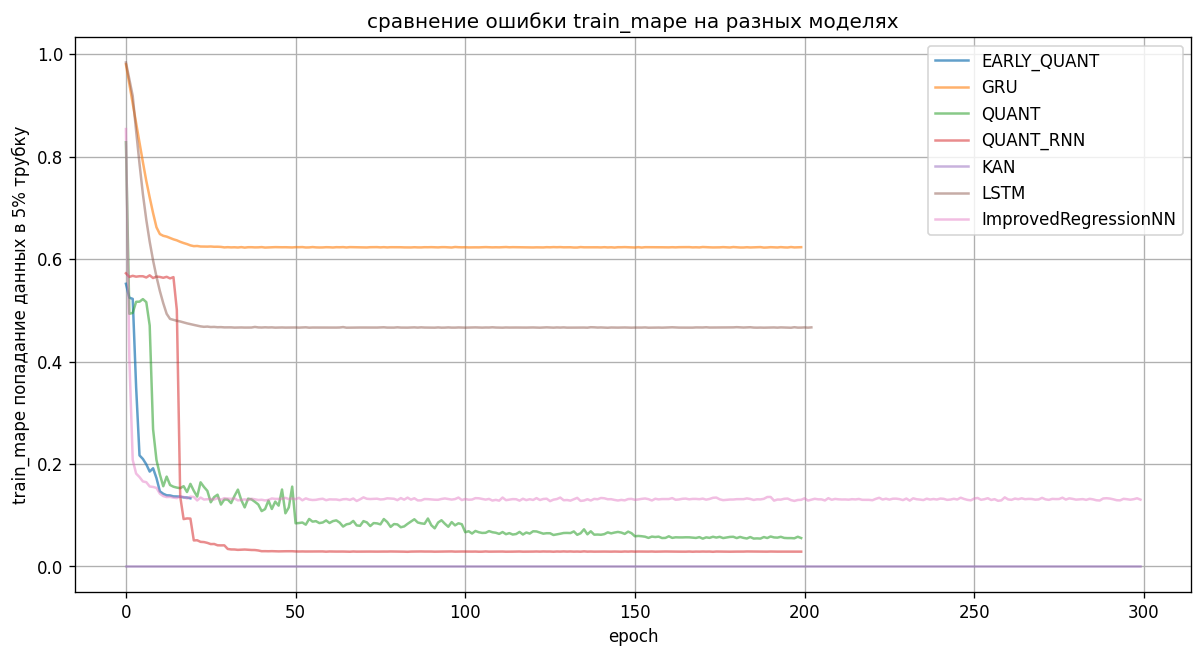

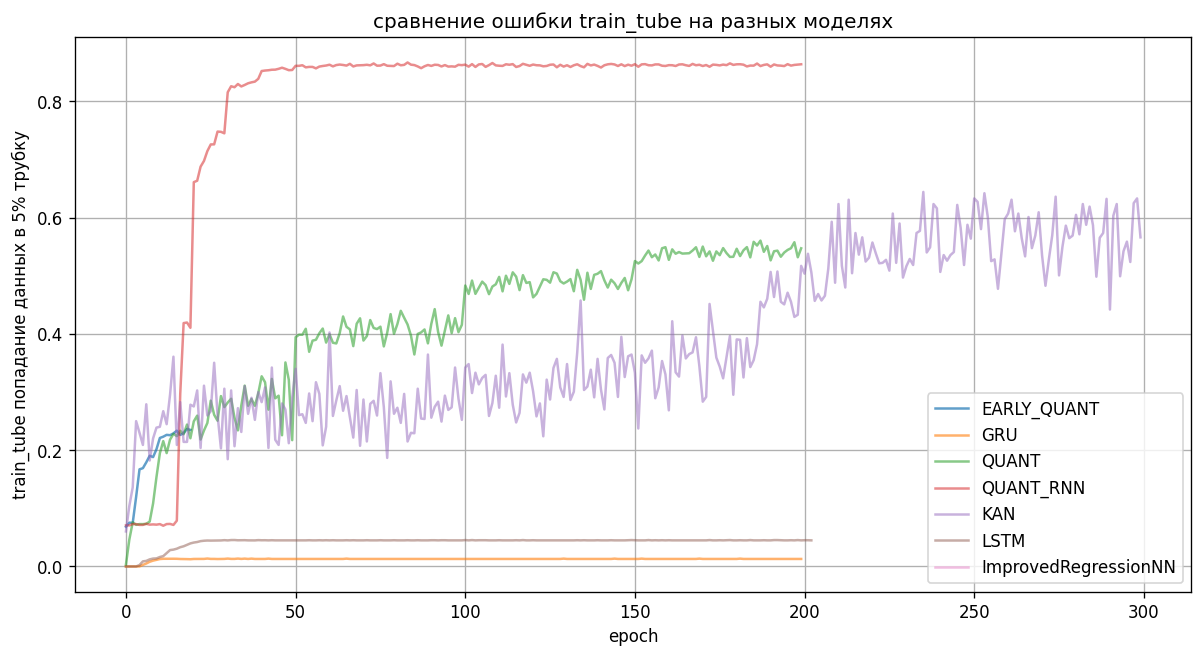

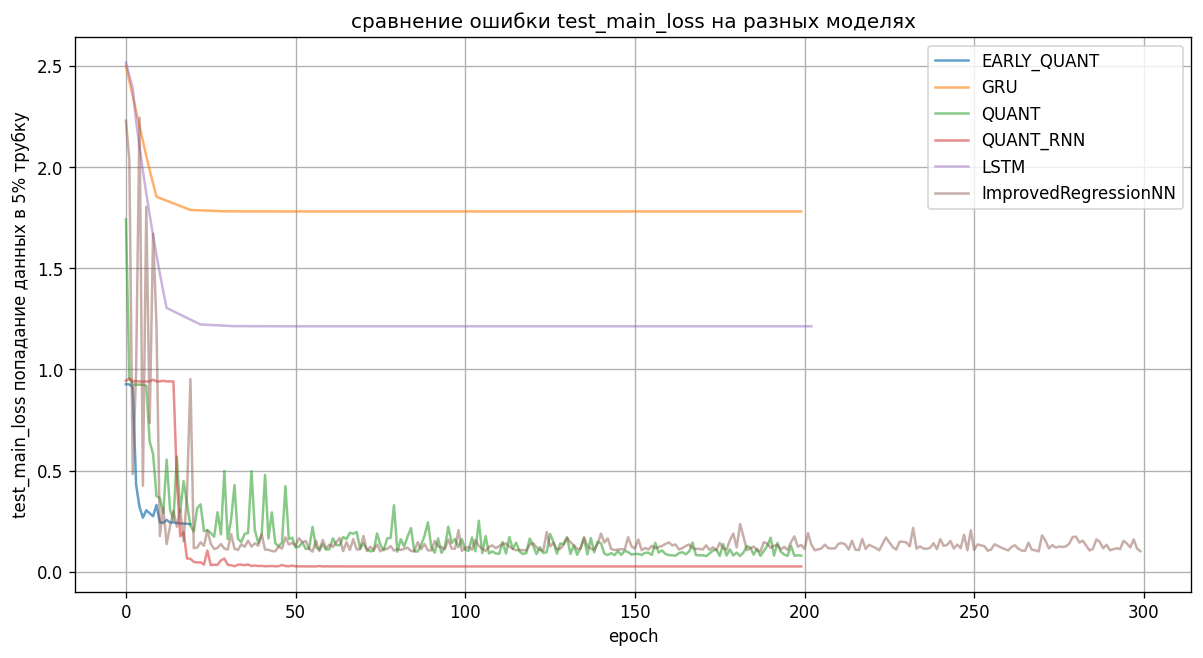

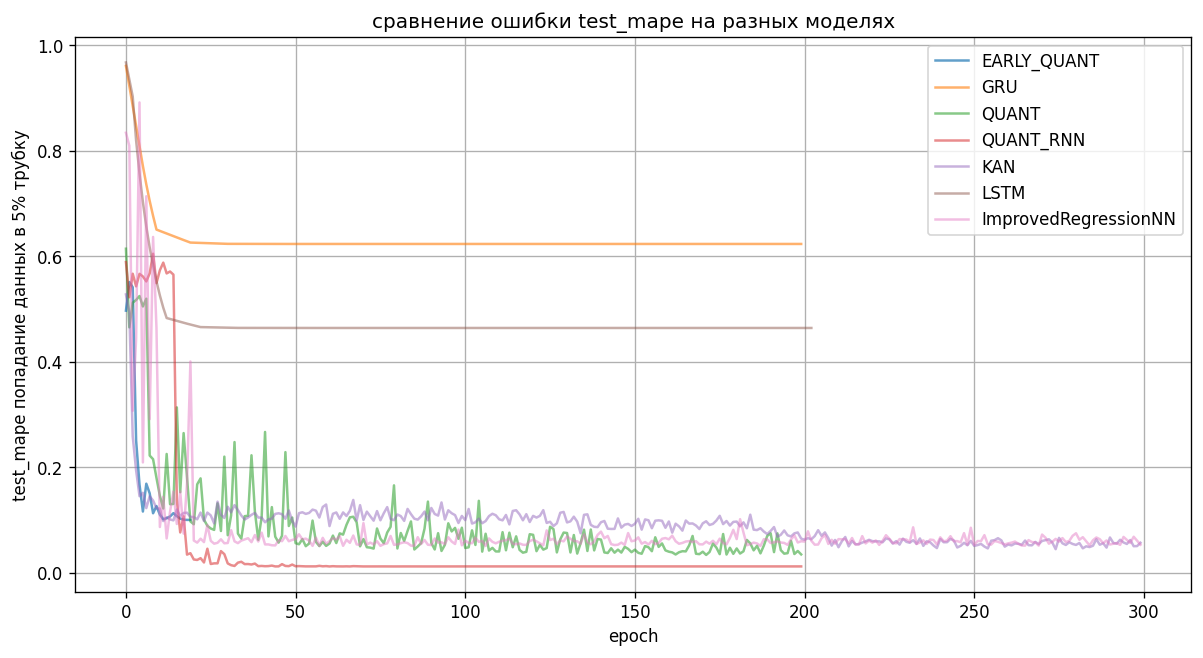

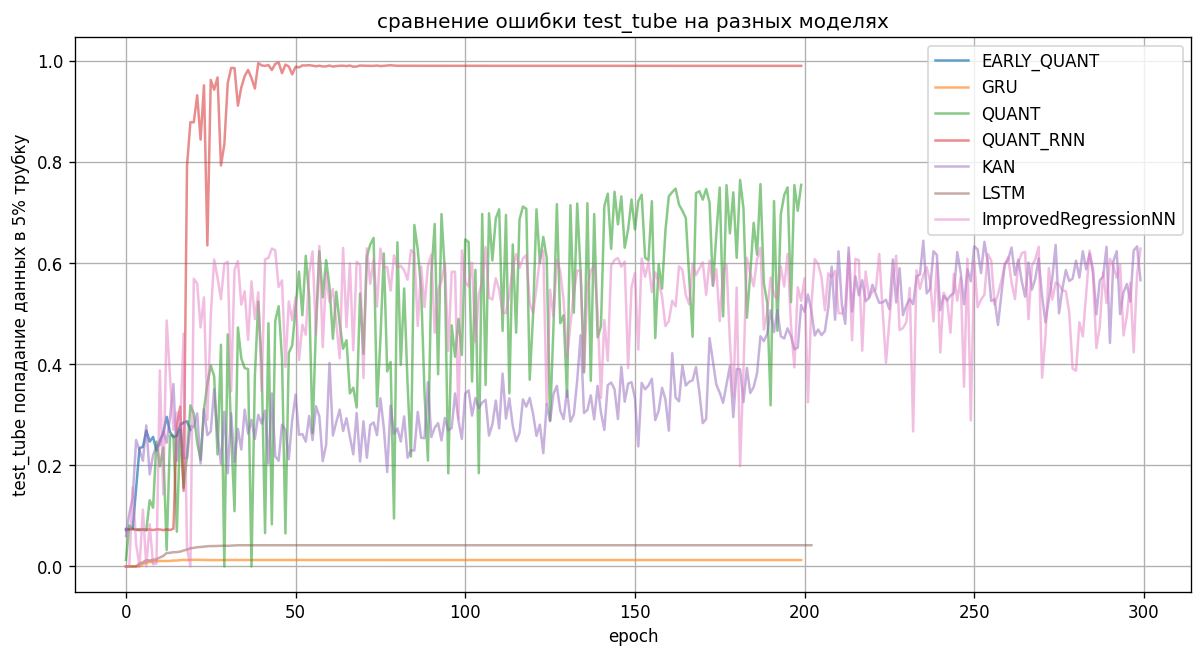

In [4]:

def learn_show(data,loss:str,max_epoch = 200):
    plt.figure(figsize=(12,6), dpi=120)
    for index,(key,item) in enumerate(data.items()):
        if loss in item.keys():
            plt.plot([i for i in range(len(item[loss][:max_epoch]))],item[loss][:max_epoch],label=key, alpha = 0.7*(1/(index+1)**(0.2)))
    plt.xlabel('epoch')
    plt.ylabel(loss+' попадание данных в 5% трубку')
    plt.title(f'сравнение ошибки {loss} на разных моделях')
    plt.legend()
    plt.grid(True)

    plt.show()
for loss in data['EARLY_QUANT'].keys():
    learn_show(data,loss,max_epoch = 300)